In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import json
import os

In [ ]:
x = [0,1,2,3,4,5]
y = [0,0,1,1,2,3]
z = [1,2,3,3,2,1]
plt.plot(x, y)
plt.savefig(f"fig.png")

plt.plot(x, z)
plt.show()

In [ ]:
# Multimodel

NFLTimes = np.loadfile()
DFLTimes = np.loadfile()

#TIMES:
timePerVStd = None # Time per epoch per vehicle standard method. 
avgTimePerVNFL = np.average(NFLTimes) # Average time per vehicle Normal Fed Learning
maxTimePerVNFL = np.max(NFLTimes) # Normal time per vehicle Normal Fed Learning

avgTimePerVDFL = np.average(DFLTimes) # Average time per vehicle Distributed Fed Learning
maxTimePerVDFL = np.max(DFLTimes) # Normal time per vehicle Distributed Fed Learning



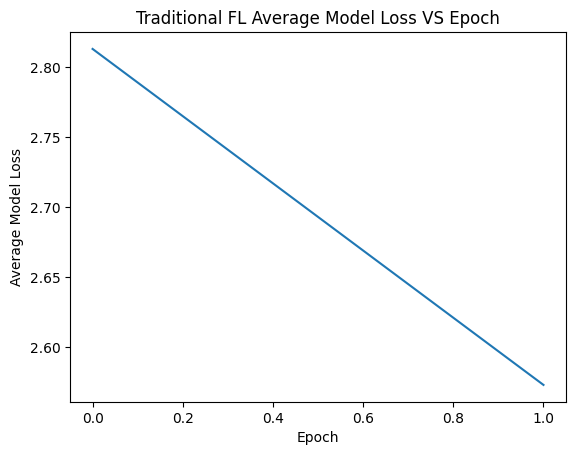

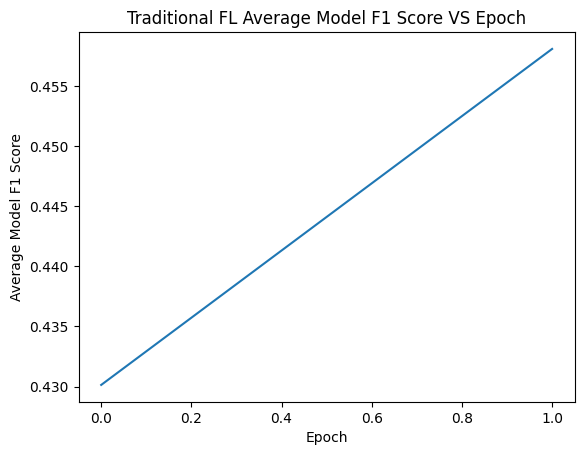

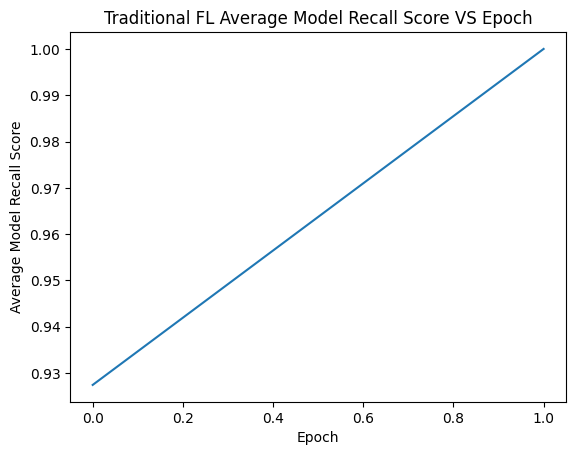

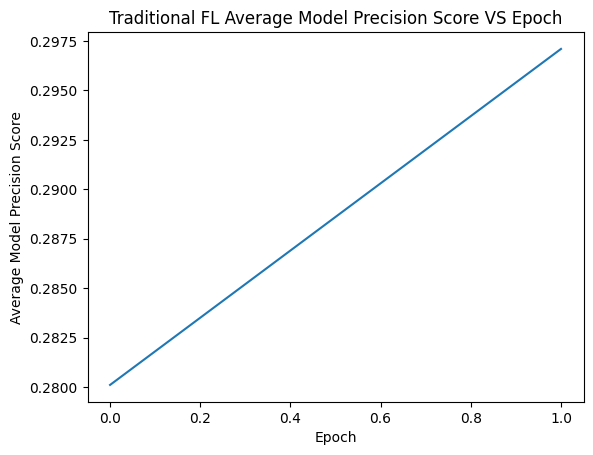

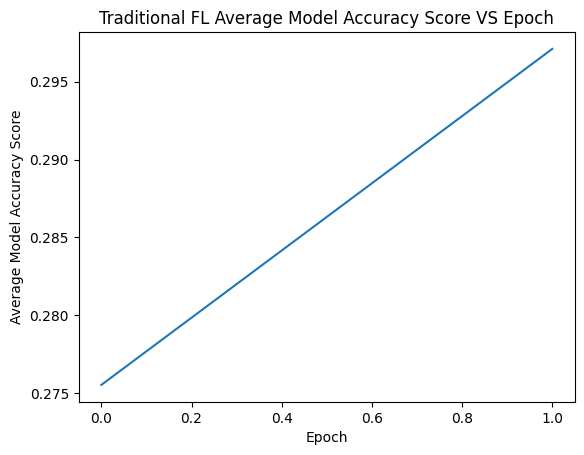

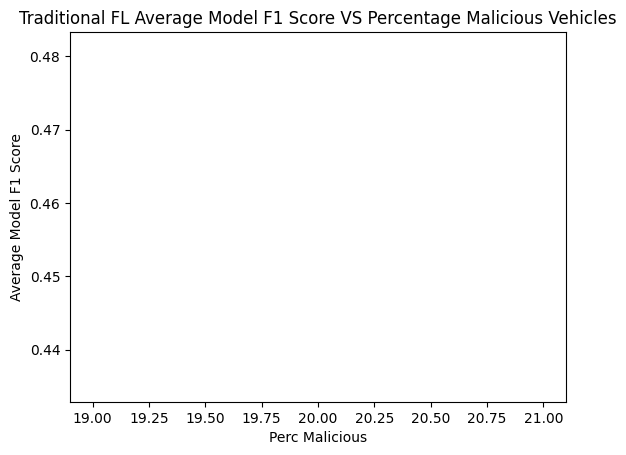

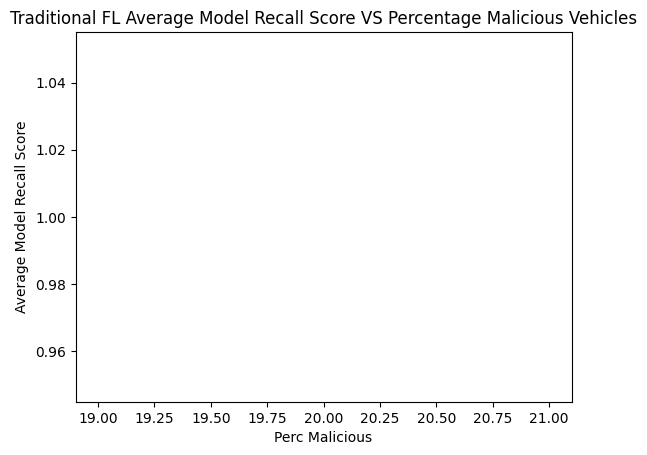

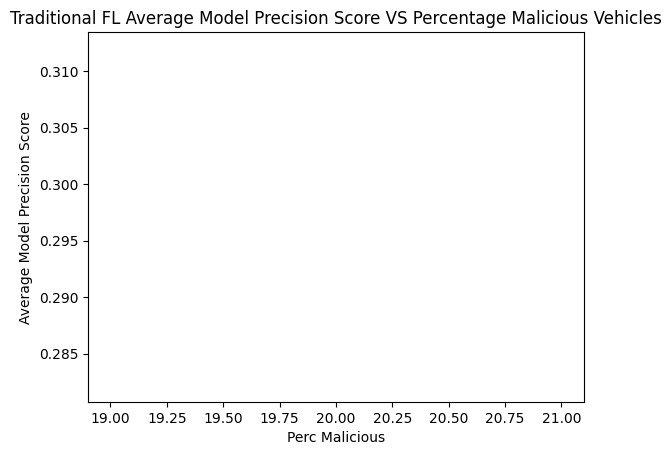

In [15]:
# Individual Module Run
path = "out/FL/True-20-2-5-5/"
plotPath = f"{path}plot/"
if not os.path.exists(plotPath):
    os.makedirs(plotPath)
modelType = "Traditional FL" # "Trad. FL" # "Stnd. Model"

#VS EPOCHS
avgLosses = genfromtxt(f'{path}avgLossVEpoch.csv',delimiter=',')
avgF1s = genfromtxt(f'{path}avgF1VEpoch.csv', delimiter=',')
avgRecalls = genfromtxt(f'{path}avgRecallVEpoch.csv', delimiter=',')
avgPrecisions = genfromtxt(f'{path}avgPrecisionVEpoch.csv', delimiter=',')
avgAccs = genfromtxt(f'{path}avgAccuracyVEpoch.csv', delimiter=',')

#VS PERC EVIL
others = json.load(open(f'{path}ExtraData.json', 'r'))
finalF1s = others['F1 V PercEvil']
finalRecalls = others['Recall V PercEvil']
finalPrecisions = others['Precision V PercEvil']
finalAccs = others['Accuracy V PercEvil']
maxVeTime = others['Max Per-Vehicle Time']
avgVeTime = others['Avg Per-Vehicle Time']
epochTotTime = others['Total Time Per Epoch']

plt.plot(avgLosses[1:,0], avgLosses[1:,1])
plt.xlabel("Epoch")
plt.ylabel("Average Model Loss")
plt.title(f"{modelType} Average Model Loss VS Epoch")
plt.savefig(f"{plotPath}LossVEpoch.png")
plt.show()

plt.plot(avgF1s[1:,0], avgF1s[1:,1])
plt.xlabel("Epoch")
plt.ylabel("Average Model F1 Score")
plt.title(f"{modelType} Average Model F1 Score VS Epoch")
plt.savefig(f"{plotPath}F1VEpoch.png")
plt.show()

plt.plot(avgRecalls[1:,0], avgRecalls[1:,1])
plt.xlabel("Epoch")
plt.ylabel("Average Model Recall Score")
plt.title(f"{modelType} Average Model Recall Score VS Epoch")
plt.savefig(f"{plotPath}RecallVEpoch.png")
plt.show()

plt.plot(avgPrecisions[1:,0], avgPrecisions[1:,1])
plt.xlabel("Epoch")
plt.ylabel("Average Model Precision Score")
plt.title(f"{modelType} Average Model Precision Score VS Epoch")
plt.savefig(f"{plotPath}PrecisionVEpoch.png")
plt.show()

plt.plot(avgAccs[1:,0], avgAccs[1:,1])
plt.xlabel("Epoch")
plt.ylabel("Average Model Accuracy Score")
plt.title(f"{modelType} Average Model Accuracy Score VS Epoch")
plt.savefig(f"{plotPath}AccuracyVEpoch.png")
plt.show()

plt.plot(finalF1s[0], finalF1s[1])
plt.xlabel("Perc Malicious")
plt.ylabel("Average Model F1 Score")
plt.title(f"{modelType} Average Model F1 Score VS Percentage Malicious Vehicles")
plt.savefig(f"{plotPath}F1VperEvil.png")
plt.show()

plt.plot(finalRecalls[0], finalRecalls[1])
plt.xlabel("Perc Malicious")
plt.ylabel("Average Model Recall Score")
plt.title(f"{modelType} Average Model Recall Score VS Percentage Malicious Vehicles")
plt.savefig(f"{plotPath}RecallVperEvil.png")
plt.show()

plt.plot(finalPrecisions[0], finalPrecisions[1])
plt.xlabel("Perc Malicious")
plt.ylabel("Average Model Precision Score")
plt.title(f"{modelType} Average Model Precision Score VS Percentage Malicious Vehicles")
plt.savefig(f"{plotPath}PrecisionVperEvil.png")
plt.show()